# Election Prediction

## Data Cleaning for Election Winner Prediction

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from numpy import int64
from sklearn.svm import SVR

from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import utils

## Reading Data For year 2004

In [ ]:
df1=pd.read_csv('D:\MCA\FY MCA\Trim 3\AIML\Project\Winner Pred\\2004_2.csv')
df1

,SR,PC Name,No,Type,State,Winning Candidate,Party,Electors,Votes,Turnout,Margin,Margin %,ACs,Year
0,1,Adilabad,35,GEN,Andhra Pradesh,Madhusudhan Reddy Takkala,Telangana Rashtra Samithi,1140834,830601,72.80%,40974,0.049,AC View,2004
1,2,Adoor,17,GEN,Kerala,Chengara Surendran,Communist Party Of India,960122,682227,71.10%,54534,0.080,AC View,2004
2,3,Agra,69,GEN,Uttar Pradesh [2000 Onwards],Raj Babbar,Samajwadi Party,1430713,642675,44.90%,57342,0.089,AC View,2004
3,4,Ahmedabad,10,GEN,Gujarat,Harin Pathak,Bharatiya Janta Party,1382793,548391,39.70%,77605,0.142,AC View,2004
4,5,Ahmednagar,39,GEN,Maharashtra,Gadakh Tukaram Gangadhar,Nationalist Congress Party,1295593,686554,53.00%,75077,0.109,AC View,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,539,Vishnupur,36,GEN,West Bengal,Susmita Bauri,Communist Party Of India (MARXIST),1052852,803360,76.30%,331829,0.413,AC View,2004
539,540,Warangal,39,GEN,Andhra Pradesh,Dharavath Ravinder Naik,Telangana Rashtra Samithi,1215167,921516,75.80%,19262,0.021,AC View,2004
540,541,Wardha,27,GEN,Maharashtra,Wagmare Suresh Ganapat,Bharatiya Janta Party,1144924,625840,54.70%,3188,0.005,AC View,2004
541,542,Washim,20,ST,Maharashtra,Gawali (PATIL) KU. BHAVANA PUNDLIKRAO,Shiv Sena,1151886,719643,62.50%,60898,0.085,AC View,2004


## Reading Data For year 2009

In [ ]:
df2=pd.read_csv('D:\MCA\FY MCA\Trim 3\AIML\Project\Winner Pred\\2009.csv')
df2

,PC Name,No,Type,State,Winning Candidate,Party,Electors,Votes,Turnout,Margin,Margin %,Year
0,Adilabad,1,ST,Andhra Pradesh,Rathod Ramesh,Telugu Desam,1131211,863248,76.30%,115087,0.133,2009
1,Agra,18,SC,Uttar Pradesh [2000 Onwards],Dr. Ramshankar,Bharatiya Janta Party,1539683,648793,42.10%,9715,0.015,2009
2,Ahmadnagar,37,GEN,Maharashtra,Gandhi Dilipkumar Mansukhlal,Bharatiya Janta Party,1517951,787153,51.90%,46731,0.059,2009
3,Ahmedabad East,7,GEN,Gujarat,Harin Pathak,Bharatiya Janta Party,1411761,597395,42.30%,86056,0.144,2009
4,Ahmedabad West,8,SC,Gujarat,Dr. Solanki Kiritbhai Premajibhai,Bharatiya Janta Party,1431080,690071,48.20%,91127,0.132,2009
...,...,...,...,...,...,...,...,...,...,...,...,...
538,Wardha,8,GEN,Maharashtra,Datta Meghe,Indian National Congress,1408781,769846,54.70%,95918,0.125,2009
539,Wayanad,4,GEN,Kerala,M.I. Shanavas,Indian National Congress,1102097,825047,74.90%,153439,0.186,2009
540,West Delhi,6,GEN,Delhi [1977 Onwards],Mahabal Mishra,Indian National Congress,1687727,884241,52.40%,129010,0.146,2009
541,Yavatmal-Washim,14,GEN,Maharashtra,Bhavana Gawali (Patil),Shiv Sena,1554042,840574,54.10%,56951,0.068,2009


## Reading Data For year 2014

In [ ]:
df3=pd.read_csv('D:\MCA\FY MCA\Trim 3\AIML\Project\Winner Pred\\2014.csv')
df3

,PC Name,No,Type,State,Winning Candidate,Party,Electors,Votes,Turnout,Margin,Margin %,Year
0,Adilabad,1,ST,Telangana,Godam Nagesh,Telangana Rashtra Samithi,1386233,1045839,75.40%,171290,0.164,2014
1,Agra,18,SC,Uttar Pradesh [2000 Onwards],Dr. Ram Shankar Katheria,Bharatiya Janta Party,1814739,1070400,59.00%,300263,0.281,2014
2,Ahmadnagar,37,GEN,Maharashtra,Gandhi Dilipkumar Mansukhlal,Bharatiya Janta Party,1699408,1062318,62.50%,209122,0.197,2014
3,Ahmedabad East,7,GEN,Gujarat,Paresh Rawal,Bharatiya Janta Party,1601832,985525,61.50%,326633,0.331,2014
4,Ahmedabad West,8,SC,Gujarat,Dr. Kirit P Solanki,Bharatiya Janta Party,1534400,964609,62.90%,320311,0.332,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
538,Wardha,8,GEN,Maharashtra,Ramdas Chandrabhanji Tadas,Bharatiya Janta Party,1564553,1013445,64.80%,215783,0.213,2014
539,Wayanad,4,GEN,Kerala,M I Shanavas,Indian National Congress,1249420,915006,73.20%,20870,0.023,2014
540,West Delhi,6,GEN,Delhi [1977 Onwards],Parvesh Sahib Singh Verma,Bharatiya Janta Party,2039410,1347971,66.10%,268586,0.199,2014
541,Yavatmal-Washim,14,GEN,Maharashtra,Gawali Bhavana Pundlikrao,Shiv Sena,1743498,1032949,59.30%,93816,0.091,2014


## Reading Data For year 2019

In [ ]:
df4=pd.read_csv('D:\MCA\FY MCA\Trim 3\AIML\Project\Winner Pred\\2019_2.csv')
df4

,SR,PC Name,No,Type,State,Winning Candidate,Party,Electors,Votes,Turnout,Margin,Margin %,Year
0,1,Adilabad,1,ST,Telangana,Soyam Bapu Rao,Bharatiya Janta Party,1382837,1063730,77.90%,58560,0.055,2019
1,2,Agra,18,SC,Uttar Pradesh [2000 Onwards],Satyapal Singh Baghel,Bharatiya Janta Party,1866262,1145323,61.70%,211546,0.185,2019
2,3,Ahmadnagar,37,GEN,Maharashtra,Dr. Sujay Radhakrishna Vikhepatil,Bharatiya Janta Party,1793677,1203797,67.30%,281474,0.234,2019
3,4,Ahmedabad East,7,GEN,Gujarat,Patel Hasmukhbhai Somabhai,Bharatiya Janta Party,1713598,1116367,65.70%,434330,0.389,2019
4,5,Ahmedabad West,8,SC,Gujarat,Dr. Kirit P. Solanki,Bharatiya Janta Party,1580673,997024,64.00%,321546,0.323,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,Wardha,8,GEN,Maharashtra,Ramdas Chandrabhanji Tadas,Bharatiya Janta Party,1679788,1072570,64.20%,187191,0.175,2019
537,538,Wayanad,4,GEN,Kerala,Rahul Gandhi,Indian National Congress,1306141,1092197,83.80%,431770,0.395,2019
538,539,West Delhi,6,GEN,Delhi [1977 Onwards],Sant Prasad Sinha,Bharatiya Janta Party,2039410,1441601,71.10%,578486,0.401,2019
539,540,Yavatmal-Washi,14,GEN,Maharashtra,Bhavana Pundlikrao Gawali,Shiv Sena,1812059,1174220,65.00%,117939,0.100,2019


## Storing Dataframes paths to variables

In [ ]:
dfp1='D:\MCA\FY MCA\Trim 3\AIML\Project\Winner Pred\\2004_2.csv'
dfp2='D:\MCA\FY MCA\Trim 3\AIML\Project\Winner Pred\\2009.csv'
dfp3='D:\MCA\FY MCA\Trim 3\AIML\Project\Winner Pred\\2014.csv'
dfp4='D:\MCA\FY MCA\Trim 3\AIML\Project\Winner Pred\\2019_2.csv'

## Concatinating the Dataframes

In [ ]:
df= pd.concat(
   map(pd.read_csv, [dfp1,dfp2,dfp3,dfp4]), ignore_index=True)

In [ ]:
df

,SR,PC Name,No,Type,State,Winning Candidate,Party,Electors,Votes,Turnout,Margin,Margin %,ACs,Year
0,1.0,Adilabad,35,GEN,Andhra Pradesh,Madhusudhan Reddy Takkala,Telangana Rashtra Samithi,1140834,830601,72.80%,40974,0.049,AC View,2004
1,2.0,Adoor,17,GEN,Kerala,Chengara Surendran,Communist Party Of India,960122,682227,71.10%,54534,0.080,AC View,2004
2,3.0,Agra,69,GEN,Uttar Pradesh [2000 Onwards],Raj Babbar,Samajwadi Party,1430713,642675,44.90%,57342,0.089,AC View,2004
3,4.0,Ahmedabad,10,GEN,Gujarat,Harin Pathak,Bharatiya Janta Party,1382793,548391,39.70%,77605,0.142,AC View,2004
4,5.0,Ahmednagar,39,GEN,Maharashtra,Gadakh Tukaram Gangadhar,Nationalist Congress Party,1295593,686554,53.00%,75077,0.109,AC View,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2165,537.0,Wardha,8,GEN,Maharashtra,Ramdas Chandrabhanji Tadas,Bharatiya Janta Party,1679788,1072570,64.20%,187191,0.175,NaN,2019
2166,538.0,Wayanad,4,GEN,Kerala,Rahul Gandhi,Indian National Congress,1306141,1092197,83.80%,431770,0.395,NaN,2019
2167,539.0,West Delhi,6,GEN,Delhi [1977 Onwards],Sant Prasad Sinha,Bharatiya Janta Party,2039410,1441601,71.10%,578486,0.401,NaN,2019
2168,540.0,Yavatmal-Washi,14,GEN,Maharashtra,Bhavana Pundlikrao Gawali,Shiv Sena,1812059,1174220,65.00%,117939,0.100,NaN,2019


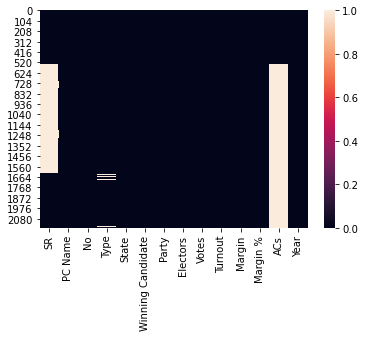

In [ ]:
sns.heatmap(df.isna())

### Checking the null values using heat map
### We can see SR,Type,ACs have null value

## Removing null Values

In [ ]:
df['Type'].unique()

array(['GEN', 'ST', 'SC', nan], dtype=object)

In [ ]:
count = df['Type'].value_counts()
print(count)

GEN    1623
SC      330
ST      185
Name: Type, dtype: int64


##### Finding hightest frequency amoungs the Type
##### We can see GEN has highest frequency

In [ ]:
df['Type'] = df['Type'].replace(np.nan,'GEN')

##### Replacing nan values to GEN

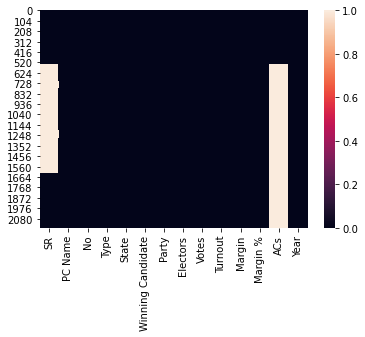

In [ ]:
sns.heatmap(df.isna())

### We can see that Type has to null values

In [ ]:
df.pop("SR")

0         1.0
1         2.0
2         3.0
3         4.0
4         5.0
        ...  
2165    537.0
2166    538.0
2167    539.0
2168    540.0
2169    541.0
Name: SR, Length: 2170, dtype: float64

### Droping coloumn SR

In [ ]:
df.pop("ACs")

0       AC View
1       AC View
2       AC View
3       AC View
4       AC View
         ...   
2165        NaN
2166        NaN
2167        NaN
2168        NaN
2169        NaN
Name: ACs, Length: 2170, dtype: object

### Droping coloumn ACS

In [ ]:
df.head()

,PC Name,No,Type,State,Winning Candidate,Party,Electors,Votes,Turnout,Margin,Margin %,Year
0,Adilabad,35,GEN,Andhra Pradesh,Madhusudhan Reddy Takkala,Telangana Rashtra Samithi,1140834,830601,72.80%,40974,0.049,2004
1,Adoor,17,GEN,Kerala,Chengara Surendran,Communist Party Of India,960122,682227,71.10%,54534,0.080,2004
2,Agra,69,GEN,Uttar Pradesh [2000 Onwards],Raj Babbar,Samajwadi Party,1430713,642675,44.90%,57342,0.089,2004
3,Ahmedabad,10,GEN,Gujarat,Harin Pathak,Bharatiya Janta Party,1382793,548391,39.70%,77605,0.142,2004
4,Ahmednagar,39,GEN,Maharashtra,Gadakh Tukaram Gangadhar,Nationalist Congress Party,1295593,686554,53.00%,75077,0.109,2004


In [ ]:
df["Turnout"]=df["Turnout"].str.replace('%','')

In [ ]:
df.head()

,PC Name,No,Type,State,Winning Candidate,Party,Electors,Votes,Turnout,Margin,Margin %,Year
0,Adilabad,35,GEN,Andhra Pradesh,Madhusudhan Reddy Takkala,Telangana Rashtra Samithi,1140834,830601,72.80,40974,0.049,2004
1,Adoor,17,GEN,Kerala,Chengara Surendran,Communist Party Of India,960122,682227,71.10,54534,0.080,2004
2,Agra,69,GEN,Uttar Pradesh [2000 Onwards],Raj Babbar,Samajwadi Party,1430713,642675,44.90,57342,0.089,2004
3,Ahmedabad,10,GEN,Gujarat,Harin Pathak,Bharatiya Janta Party,1382793,548391,39.70,77605,0.142,2004
4,Ahmednagar,39,GEN,Maharashtra,Gadakh Tukaram Gangadhar,Nationalist Congress Party,1295593,686554,53.00,75077,0.109,2004


In [ ]:
df['Turnout']=df['Turnout'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2170 entries, 0 to 2169
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PC Name            2170 non-null   object 
 1   No                 2170 non-null   int64  
 2   Type               2170 non-null   object 
 3   State              2170 non-null   object 
 4   Winning Candidate  2170 non-null   object 
 5   Party              2170 non-null   object 
 6   Electors           2170 non-null   int64  
 7   Votes              2170 non-null   int64  
 8   Turnout            2170 non-null   float64
 9   Margin             2170 non-null   int64  
 10  Margin %           2170 non-null   float64
 11  Year               2170 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 203.6+ KB


## Assinging numerical value to categorical data

In [ ]:
df['Type'].unique()

array(['GEN', 'ST', 'SC'], dtype=object)

In [ ]:
df['Type'] = df['Type'].map({'GEN':0,'ST':1,'SC':1})

## Mapping GEN as 0, ST as 1 & SC as 1

In [ ]:
df.head()

,PC Name,No,Type,State,Winning Candidate,Party,Electors,Votes,Turnout,Margin,Margin %,Year
0,Adilabad,35,0,Andhra Pradesh,Madhusudhan Reddy Takkala,Telangana Rashtra Samithi,1140834,830601,72.8,40974,0.049,2004
1,Adoor,17,0,Kerala,Chengara Surendran,Communist Party Of India,960122,682227,71.1,54534,0.080,2004
2,Agra,69,0,Uttar Pradesh [2000 Onwards],Raj Babbar,Samajwadi Party,1430713,642675,44.9,57342,0.089,2004
3,Ahmedabad,10,0,Gujarat,Harin Pathak,Bharatiya Janta Party,1382793,548391,39.7,77605,0.142,2004
4,Ahmednagar,39,0,Maharashtra,Gadakh Tukaram Gangadhar,Nationalist Congress Party,1295593,686554,53.0,75077,0.109,2004


## Assigning states

In [ ]:
df['State'].unique()

array(['Andhra Pradesh', 'Kerala', 'Uttar Pradesh [2000 Onwards]',
       'Gujarat', 'Maharashtra', 'Rajasthan', 'West Bengal',
       'Uttarakhand', 'Haryana', 'Punjab', 'Jammu & Kashmir',
       'Andaman & Nicobar Islands', 'Tamil Nadu', 'Bihar [2000 Onwards]',
       'Arunachal Pradesh', 'Orissa', 'Assam', 'Karnataka',
       'Madhya Pradesh [2000 Onwards]', 'Chhattisgarh', 'Chandigarh',
       'Delhi [1977 Onwards]', 'Jharkhand', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'Himachal Pradesh', 'Manipur', 'Lakshadweep',
       'Mizoram', 'Goa', 'Nagaland', 'Pondicherry', 'Meghalaya', 'Sikkim',
       'Tripura', 'Telangana', 'Andhra Pradesh [2014 Onwards]'],
      dtype=object)

In [ ]:
df['State'].replace( {'Andhra Pradesh [2014 Onwards]':'Andhra Pradesh',
                      'Uttar Pradesh [2000 Onwards]':'Uttar Pradesh',
                                'Bihar [2000 Onwards]':'Bihar',
                               'Madhya Pradesh [2000 Onwards]':'Madhya Pradesh',
                               'Delhi [1977 Onwards]':'Delhi'},inplace=True)

In [ ]:
df['State'].unique()

array(['Andhra Pradesh', 'Kerala', 'Uttar Pradesh', 'Gujarat',
       'Maharashtra', 'Rajasthan', 'West Bengal', 'Uttarakhand',
       'Haryana', 'Punjab', 'Jammu & Kashmir',
       'Andaman & Nicobar Islands', 'Tamil Nadu', 'Bihar',
       'Arunachal Pradesh', 'Orissa', 'Assam', 'Karnataka',
       'Madhya Pradesh', 'Chhattisgarh', 'Chandigarh', 'Delhi',
       'Jharkhand', 'Dadra & Nagar Haveli', 'Daman & Diu',
       'Himachal Pradesh', 'Manipur', 'Lakshadweep', 'Mizoram', 'Goa',
       'Nagaland', 'Pondicherry', 'Meghalaya', 'Sikkim', 'Tripura',
       'Telangana'], dtype=object)

In [ ]:
df.head()

,PC Name,No,Type,State,Winning Candidate,Party,Electors,Votes,Turnout,Margin,Margin %,Year
0,Adilabad,35,0,Andhra Pradesh,Madhusudhan Reddy Takkala,Telangana Rashtra Samithi,1140834,830601,72.8,40974,0.049,2004
1,Adoor,17,0,Kerala,Chengara Surendran,Communist Party Of India,960122,682227,71.1,54534,0.080,2004
2,Agra,69,0,Uttar Pradesh,Raj Babbar,Samajwadi Party,1430713,642675,44.9,57342,0.089,2004
3,Ahmedabad,10,0,Gujarat,Harin Pathak,Bharatiya Janta Party,1382793,548391,39.7,77605,0.142,2004
4,Ahmednagar,39,0,Maharashtra,Gadakh Tukaram Gangadhar,Nationalist Congress Party,1295593,686554,53.0,75077,0.109,2004


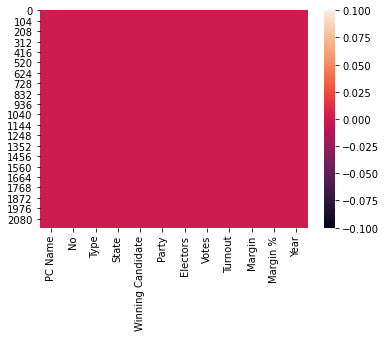

In [ ]:
sns.heatmap(df.isna())

### No Null Values

## Associating Parties as their groups NDA, UPA and Independent

In [ ]:
df['Party'].unique()

array(['Telangana Rashtra Samithi', 'Communist Party Of India',
       'Samajwadi Party', 'Bharatiya Janta Party',
       'Nationalist Congress Party', 'Bahujan Samaj Party',
       'Indian National Congress', 'Revolutionary Socialist Party',
       'Communist Party Of India (MARXIST)', 'Shiv Sena', 'Independent',
       'Telugu Desam', 'Jammu & Kashmir Peoples Democratic Party',
       'Janata Dal (United)', 'Pattali Makkal Katchi',
       'Rashtriya Janata Dal', 'Biju Janata Dal', 'Rashtriya Lok Dal',
       'Lok Jan Shakti Party', 'Samajwadi Janata Party (RASHTRIYA)',
       'Jammu & Kashmir National Conference', 'All India Forward Bloc',
       'Shiromani Akali Dal', 'All India Trinamool Congress',
       'Janata Dal (Secular)', 'Dravida Munetra Kazhagam',
       'Bharatiya Navshakti Party', 'Asom Gana Parisad',
       'Jharkhand Mukti Morcha', 'All India Majlis-E-Ittehadul Muslimoon',
       'Kerala Congress', 'Mizo National Front',
       'Indian Federal Democratic Party', 'Nagal

In [ ]:
df['NDA']=0
df['UPA']=0
df['Independent']=0

In [ ]:
df.loc[df['Party'] == 'Telangana Rashtra Samithi', 'Independent'] = '1'
df.loc[df['Party'] == 'Communist Party Of India', 'Independent'] = '1'
df.loc[df['Party'] == 'Samajwadi Party', 'Independent'] = '1'
df.loc[df['Party'] == 'Bharatiya Janta Party', 'NDA'] = '1'
df.loc[df['Party'] == 'Nationalist Congress Party', 'UPA'] = '1'
df.loc[df['Party'] == 'Bahujan Samaj Party', 'Independent'] = '1'
df.loc[df['Party'] == 'Indian National Congress', 'UPA'] = '1'
df.loc[df['Party'] == 'Revolutionary Socialist Party', 'UPA'] = '1'
df.loc[df['Party'] == 'Communist Party Of India (MARXIST)', 'UPA'] = '1'
df.loc[df['Party'] == 'Shiv Sena', 'UPA'] = '1'
df.loc[df['Party'] == 'Independent', 'Independent'] = '1'
df.loc[df['Party'] == 'Telugu Desam', 'Independent'] = '1'
df.loc[df['Party'] == 'Jammu & Kashmir Peoples Democratic Party', 'UPA'] = '1'
df.loc[df['Party'] == 'Janata Dal (United)', 'NDA'] = '1'
df.loc[df['Party'] == 'Pattali Makkal Katchi', 'NDA'] = '1'
df.loc[df['Party'] == 'Rashtriya Janata Dal', 'UPA'] = '1'
df.loc[df['Party'] == 'Biju Janata Dal', 'Independent'] = '1'
df.loc[df['Party'] == 'Rashtriya Lok Dal', 'Independent'] = '1'
df.loc[df['Party'] == 'Lok Jan Shakti Party', 'NDA'] = '1'
df.loc[df['Party'] == 'Samajwadi Janata Party (RASHTRIYA)', 'Independent'] = '1'
df.loc[df['Party'] == 'Jammu & Kashmir National Conference', 'UPA'] = '1'
df.loc[df['Party'] == 'All India Forward Bloc', 'Independent'] = '1'
df.loc[df['Party'] == 'Shiromani Akali Dal', 'Independent'] = '1'
df.loc[df['Party'] == 'All India Trinamool Congress', 'Independent'] = '1'
df.loc[df['Party'] == 'Janata Dal (Secular)', 'NDA'] = '1'
df.loc[df['Party'] == 'Dravida Munetra Kazhagam', 'UPA'] = '1'
df.loc[df['Party'] == 'Bharatiya Navshakti Party', 'Independent'] = '1'
df.loc[df['Party'] == 'Jharkhand Mukti Morcha', 'UPA'] = '1'

df.loc[df['Party'] == 'Asom Gana Parisad', 'NDA'] = '1'
df.loc[df['Party'] == 'All India Majlis-E-Ittehadul Muslimoon', 'Independent'] = '1'
df.loc[df['Party'] == 'Kerala Congress', 'UPA'] = '1'
df.loc[df['Party'] == 'Mizo National Front', 'NDA'] = '1'
df.loc[df['Party'] == 'Indian Federal Democratic Party', 'Independent'] = '1'
df.loc[df['Party'] == 'Republican Party Of India (A)', 'NDA'] = '1'
df.loc[df['Party'] == 'National Loktantrik Party', 'Independent'] = '1'
df.loc[df['Party'] == 'Nagaland Peoples Front', 'NDA'] = '1'
df.loc[df['Party'] == 'Marumalarchi Dravida Munnetra Kazhagam', 'UPA'] = '1'
df.loc[df['Party'] == 'Muslim League Kerala State Committee', 'Independent'] = '1'
df.loc[df['Party'] == 'Sikkim Democratic Front', 'NDA'] = '1'
df.loc[df['Party'] == 'All India Anna Dravida Munnetra Kazhagam', 'NDA'] = '1'
df.loc[df['Party'] == 'Viduthalai Chiruthaigal Katchi', 'UPA'] = '1'
df.loc[df['Party'] == 'Assam United Democratic Front', 'Independent'] = '1'
df.loc[df['Party'] == 'Swabhimani Paksha', 'UPA'] = '1'
df.loc[df['Party'] == 'Haryana Janhit Congress (BL)', 'Independent'] = '1'
df.loc[df['Party'] == 'Jharkhand Vikas Morcha (Prajatantrik)', 'Independent'] = '1'
df.loc[df['Party'] == 'Bodaland Peoples Front', 'Independent'] = '1'
df.loc[df['Party'] == 'Kerala Congress(M)', 'UPA'] = '1'
df.loc[df['Party'] == 'Bahujan Vikas Aaghadi', 'UPA'] = '1'
df.loc[df['Party'] == 'Yuvajana Sramika Rythu Congress Party', 'Independent'] = '1'
df.loc[df['Party'] == 'All India United Democratic Front', 'Independent'] = '1'
df.loc[df['Party'] == 'Aam Aadmi Party', 'Independent'] = '1'
df.loc[df['Party'] == 'Indian National Lok Dal', 'Independent'] = '1'
df.loc[df['Party'] == 'Rashtriya Lok Samta Party', 'Independent'] = '1'
df.loc[df['Party'] == 'Indian Union Muslim League', 'UPA'] = '1'
df.loc[df['Party'] == 'Apna Dal', 'NDA'] = '1'
df.loc[df['Party'] == 'Naga Peoples Front', 'Independent'] = '1'
df.loc[df['Party'] == 'All India N.R. Congress', 'Independent'] = '1'
df.loc[df['Party'] == "National People's Party", 'NDA'] = '1'
df.loc[df['Party'] == 'Communist Party Of India (Marxist)', 'Independent'] = '1'
df.loc[df['Party'] == 'All India Majlis-E-Ittehadul Muslimeen', 'Independent'] = '1'
df.loc[df['Party'] == 'All Jharkhand Students Union', 'NDA'] = '1'
df.loc[df['Party'] == 'Nationalist Democratic Progressive Party', 'NDA'] = '1'
df.loc[df['Party'] == 'Rashtriya Loktantrik Party', 'Independent'] = '1'
df.loc[df['Party'] == 'Sikkim Krantikari Morcha', 'NDA'] = '1'
df.loc[df['Party'] == 'Apna Dal (Soneylal)', 'NDA'] = '1'

In [ ]:
df.head(5)

,PC Name,No,Type,State,Winning Candidate,Party,Electors,Votes,Turnout,Margin,Margin %,Year,NDA,UPA,Independent
0,Adilabad,35,0,Andhra Pradesh,Madhusudhan Reddy Takkala,Telangana Rashtra Samithi,1140834,830601,72.8,40974,0.049,2004,0,0,1
1,Adoor,17,0,Kerala,Chengara Surendran,Communist Party Of India,960122,682227,71.1,54534,0.080,2004,0,0,1
2,Agra,69,0,Uttar Pradesh,Raj Babbar,Samajwadi Party,1430713,642675,44.9,57342,0.089,2004,0,0,1
3,Ahmedabad,10,0,Gujarat,Harin Pathak,Bharatiya Janta Party,1382793,548391,39.7,77605,0.142,2004,1,0,0
4,Ahmednagar,39,0,Maharashtra,Gadakh Tukaram Gangadhar,Nationalist Congress Party,1295593,686554,53.0,75077,0.109,2004,0,1,0


In [ ]:
df['Independent'] = df['Independent'].fillna(0)
df['NDA'] = df['NDA'].fillna(0)
df['UPA'] = df['UPA'].fillna(0)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2170 entries, 0 to 2169
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PC Name            2170 non-null   object 
 1   No                 2170 non-null   int64  
 2   Type               2170 non-null   int64  
 3   State              2170 non-null   object 
 4   Winning Candidate  2170 non-null   object 
 5   Party              2170 non-null   object 
 6   Electors           2170 non-null   int64  
 7   Votes              2170 non-null   int64  
 8   Turnout            2170 non-null   float64
 9   Margin             2170 non-null   int64  
 10  Margin %           2170 non-null   float64
 11  Year               2170 non-null   int64  
 12  NDA                2170 non-null   object 
 13  UPA                2170 non-null   object 
 14  Independent        2170 non-null   object 
dtypes: float64(2), int64(6), object(7)
memory usage: 254.4+ KB


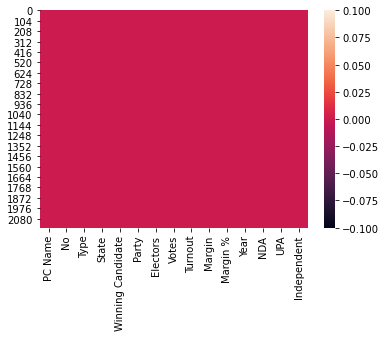

In [ ]:
sns.heatmap(df.isna())

## Seprating Years

In [ ]:
df['Year'].unique()

array([2004, 2009, 2014, 2019], dtype=int64)

In [ ]:
df['2004']=0
df['2009']=0
df['2014']=0
df['2019']=0

In [ ]:
df.loc[df['Year'] == 2019, '2019'] = '1'
df.loc[df['Year'] == 2014, '2014'] = '1'
df.loc[df['Year'] == 2009,'2009'] = '1'
df.loc[df['Year'] == 2004, '2004'] = '1'


In [ ]:
df

,PC Name,No,Type,State,Winning Candidate,Party,Electors,Votes,Turnout,Margin,Margin %,Year,NDA,UPA,Independent,2004,2009,2014,2019
0,Adilabad,35,0,Andhra Pradesh,Madhusudhan Reddy Takkala,Telangana Rashtra Samithi,1140834,830601,72.8,40974,0.049,2004,0,0,1,1,0,0,0
1,Adoor,17,0,Kerala,Chengara Surendran,Communist Party Of India,960122,682227,71.1,54534,0.080,2004,0,0,1,1,0,0,0
2,Agra,69,0,Uttar Pradesh,Raj Babbar,Samajwadi Party,1430713,642675,44.9,57342,0.089,2004,0,0,1,1,0,0,0
3,Ahmedabad,10,0,Gujarat,Harin Pathak,Bharatiya Janta Party,1382793,548391,39.7,77605,0.142,2004,1,0,0,1,0,0,0
4,Ahmednagar,39,0,Maharashtra,Gadakh Tukaram Gangadhar,Nationalist Congress Party,1295593,686554,53.0,75077,0.109,2004,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2165,Wardha,8,0,Maharashtra,Ramdas Chandrabhanji Tadas,Bharatiya Janta Party,1679788,1072570,64.2,187191,0.175,2019,1,0,0,0,0,0,1
2166,Wayanad,4,0,Kerala,Rahul Gandhi,Indian National Congress,1306141,1092197,83.8,431770,0.395,2019,0,1,0,0,0,0,1
2167,West Delhi,6,0,Delhi,Sant Prasad Sinha,Bharatiya Janta Party,2039410,1441601,71.1,578486,0.401,2019,1,0,0,0,0,0,1
2168,Yavatmal-Washi,14,0,Maharashtra,Bhavana Pundlikrao Gawali,Shiv Sena,1812059,1174220,65.0,117939,0.100,2019,0,1,0,0,0,0,1


## Seprating States

In [ ]:
df['State'].unique()

array(['Andhra Pradesh', 'Kerala', 'Uttar Pradesh', 'Gujarat',
       'Maharashtra', 'Rajasthan', 'West Bengal', 'Uttarakhand',
       'Haryana', 'Punjab', 'Jammu & Kashmir',
       'Andaman & Nicobar Islands', 'Tamil Nadu', 'Bihar',
       'Arunachal Pradesh', 'Orissa', 'Assam', 'Karnataka',
       'Madhya Pradesh', 'Chhattisgarh', 'Chandigarh', 'Delhi',
       'Jharkhand', 'Dadra & Nagar Haveli', 'Daman & Diu',
       'Himachal Pradesh', 'Manipur', 'Lakshadweep', 'Mizoram', 'Goa',
       'Nagaland', 'Pondicherry', 'Meghalaya', 'Sikkim', 'Tripura',
       'Telangana'], dtype=object)

In [ ]:
df['Andhra Pradesh']=0
df['Kerala']=0
df['Uttar Pradesh']=0
df['Maharashtra']=0
df['Rajasthan']=0
df['West Bengal']=0
df['Uttarakhand']=0
df['Haryana']=0
df['Punjab']=0
df['Jammu & Kashmir']=0
df['Andaman & Nicobar Islands']=0
df['Tamil Nadu']=0
df['Bihar']=0
df['Arunachal Pradesh']=0
df['Orissa']=0
df['Assam']=0
df['Karnataka']=0
df['Madhya Pradesh']=0
df['Chhattisgarh']=0
df['Chandigarh']=0
df['Delhi']=0
df['Jharkhand']=0
df['Dadra & Nagar Haveli']=0
df['Daman & Diu']=0
df['Himachal Pradesh']=0
df['Manipur']=0
df['Lakshadweep']=0
df['Mizoram']=0
df['Goa']=0
df['Nagaland']=0
df['Pondicherry']=0
df['Meghalaya']=0
df['Sikkim']=0
df['Tripura']=0
df['Telangana']=0
df['Gujarat']=0

In [ ]:
df.loc[df['State'] == 'Andhra Pradesh', 'Andhra Pradesh'] = '1'
df.loc[df['State'] == 'Uttar Pradesh', 'Uttar Pradesh'] = '1'
df.loc[df['State'] == 'Gujarat', 'Gujarat'] = '1'
df.loc[df['State'] == 'Maharashtra', 'Maharashtra'] = '1'
df.loc[df['State'] == 'Rajasthan', 'Rajasthan'] = '1'
df.loc[df['State'] == 'West Bengal', 'West Bengal'] = '1'
df.loc[df['State'] == 'Uttarakhand', 'Uttarakhand'] = '1'
df.loc[df['State'] == 'Haryana', 'Haryana'] = '1'
df.loc[df['State'] == 'Punjab', 'Punjab'] = '1'
df.loc[df['State'] == 'Jammu & Kashmir', 'Jammu & Kashmir'] = '1'
df.loc[df['State'] == 'Andaman & Nicobar Islands', 'Andaman & Nicobar Islands'] = '1'
df.loc[df['State'] == 'Tamil Nadu', 'Tamil Nadu'] = '1'
df.loc[df['State'] == 'Bihar', 'Bihar'] = '1'
df.loc[df['State'] == 'Arunachal Pradesh', 'Arunachal Pradesh'] = '1'
df.loc[df['State'] == 'Orissa', 'Orissa'] = '1'
df.loc[df['State'] == 'Assam', 'Assam'] = '1'
df.loc[df['State'] == 'Karnataka', 'Karnataka'] = '1'
df.loc[df['State'] == 'Madhya Pradesh', 'Madhya Pradesh'] = '1'
df.loc[df['State'] == 'Chhattisgarh', 'Chhattisgarh'] = '1'
df.loc[df['State'] == 'Chandigarh', 'Chandigarh'] = '1'
df.loc[df['State'] == 'Delhi', 'Delhi'] = '1'
df.loc[df['State'] == 'Dadra & Nagar Haveli', 'Dadra & Nagar Haveli'] = '1'
df.loc[df['State'] == 'Jharkhand', 'Jharkhand'] = '1'
df.loc[df['State'] == 'Daman & Diu', 'Daman & Diu'] = '1'
df.loc[df['State'] == 'Himachal Pradesh', 'Himachal Pradesh'] = '1'
df.loc[df['State'] == 'Manipur', 'Manipur'] = '1'
df.loc[df['State'] == 'Lakshadweep', 'Lakshadweep'] = '1'
df.loc[df['State'] == 'Mizoram', 'Mizoram'] = '1'
df.loc[df['State'] == 'Goa', 'Goa'] = '1'
df.loc[df['State'] == 'Nagaland', 'Nagaland'] = '1'
df.loc[df['State'] == 'Pondicherry', 'Pondicherry'] = '1'
df.loc[df['State'] == 'Meghalaya', 'Meghalaya'] = '1'
df.loc[df['State'] == 'Sikkim', 'Sikkim'] = '1'
df.loc[df['State'] == 'Meghalaya', 'Meghalaya'] = '1'
df.loc[df['State'] == 'Tripura', 'Tripura'] = '1'
df.loc[df['State'] == 'Telangana', 'Telangana'] = '1'


In [ ]:
df

,PC Name,No,Type,State,Winning Candidate,Party,Electors,Votes,Turnout,Margin,...,Lakshadweep,Mizoram,Goa,Nagaland,Pondicherry,Meghalaya,Sikkim,Tripura,Telangana,Gujarat
0,Adilabad,35,0,Andhra Pradesh,Madhusudhan Reddy Takkala,Telangana Rashtra Samithi,1140834,830601,72.8,40974,...,0,0,0,0,0,0,0,0,0,0
1,Adoor,17,0,Kerala,Chengara Surendran,Communist Party Of India,960122,682227,71.1,54534,...,0,0,0,0,0,0,0,0,0,0
2,Agra,69,0,Uttar Pradesh,Raj Babbar,Samajwadi Party,1430713,642675,44.9,57342,...,0,0,0,0,0,0,0,0,0,0
3,Ahmedabad,10,0,Gujarat,Harin Pathak,Bharatiya Janta Party,1382793,548391,39.7,77605,...,0,0,0,0,0,0,0,0,0,1
4,Ahmednagar,39,0,Maharashtra,Gadakh Tukaram Gangadhar,Nationalist Congress Party,1295593,686554,53.0,75077,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2165,Wardha,8,0,Maharashtra,Ramdas Chandrabhanji Tadas,Bharatiya Janta Party,1679788,1072570,64.2,187191,...,0,0,0,0,0,0,0,0,0,0
2166,Wayanad,4,0,Kerala,Rahul Gandhi,Indian National Congress,1306141,1092197,83.8,431770,...,0,0,0,0,0,0,0,0,0,0
2167,West Delhi,6,0,Delhi,Sant Prasad Sinha,Bharatiya Janta Party,2039410,1441601,71.1,578486,...,0,0,0,0,0,0,0,0,0,0
2168,Yavatmal-Washi,14,0,Maharashtra,Bhavana Pundlikrao Gawali,Shiv Sena,1812059,1174220,65.0,117939,...,0,0,0,0,0,0,0,0,0,0


# Adding Alliance

In [ ]:
df['Alliance']='Independent'

df.loc[df['Party'] == 'Bharatiya Janta Party', 'Alliance'] = 'NDA'
df.loc[df['Party'] == 'Nationalist Congress Party', 'Alliance'] = 'UPA'
df.loc[df['Party'] == 'Indian National Congress', 'Alliance'] = 'UPA'
df.loc[df['Party'] == 'Revolutionary Socialist Party', 'Alliance'] = 'UPA'
df.loc[df['Party'] == 'Communist Party Of India (MARXIST)', 'Alliance'] = 'UPA'
df.loc[df['Party'] == 'Shiv Sena', 'Alliance'] = 'UPA'
df.loc[df['Party'] == 'Jammu & Kashmir Peoples Democratic Party', 'Alliance'] = 'UPA'
df.loc[df['Party'] == 'Janata Dal (United)', 'Alliance'] = 'NDA'
df.loc[df['Party'] == 'Pattali Makkal Katchi', 'Alliance'] = 'NDA'
df.loc[df['Party'] == 'Rashtriya Janata Dal', 'Alliance'] = 'UPA'
df.loc[df['Party'] == 'Lok Jan Shakti Party', 'Alliance'] = 'NDA'
df.loc[df['Party'] == 'Jammu & Kashmir National Conference', 'Alliance'] = 'UPA'
df.loc[df['Party'] == 'Janata Dal (Secular)', 'Alliance'] = 'NDA'
df.loc[df['Party'] == 'Dravida Munetra Kazhagam', 'Alliance'] = 'UPA'
df.loc[df['Party'] == 'Jharkhand Mukti Morcha', 'Alliance'] = 'UPA'

df.loc[df['Party'] == 'Asom Gana Parisad', 'Alliance'] = 'NDA'
df.loc[df['Party'] == 'Kerala Congress', 'Alliance'] = 'UPA'
df.loc[df['Party'] == 'Mizo National Front', 'Alliance'] = 'NDA'
df.loc[df['Party'] == 'Republican Party Of India (A)', 'Alliance'] = 'NDA'
df.loc[df['Party'] == 'Nagaland Peoples Front', 'Alliance'] = 'NDA'
df.loc[df['Party'] == 'Marumalarchi Dravida Munnetra Kazhagam', 'Alliance'] = 'UPA'
df.loc[df['Party'] == 'Sikkim Democratic Front', 'Alliance'] = 'NDA'
df.loc[df['Party'] == 'All India Anna Dravida Munnetra Kazhagam', 'Alliance'] = 'UPA'
df.loc[df['Party'] == 'Viduthalai Chiruthaigal Katchi', 'Alliance'] = 'UPA'
df.loc[df['Party'] == 'Swabhimani Paksha', 'Alliance'] = 'UPA'
df.loc[df['Party'] == 'Kerala Congress(M)', 'Alliance'] = 'UPA'
df.loc[df['Party'] == 'Bahujan Vikas Aaghadi', 'Alliance'] = 'UPA'
df.loc[df['Party'] == 'Indian Union Muslim League', 'Alliance'] = 'UPA'
df.loc[df['Party'] == 'Apna Dal', 'Alliance'] = 'NDA'
df.loc[df['Party'] == "National People's Party", 'Alliance'] = 'NDA'
df.loc[df['Party'] == 'All Jharkhand Students Union', 'Alliance'] = 'NDA'
df.loc[df['Party'] == 'Nationalist Democratic Progressive Party', 'Alliance'] = 'NDA'
df.loc[df['Party'] == 'Sikkim Krantikari Morcha', 'Alliance'] = 'NDA'
df.loc[df['Party'] == 'Apna Dal (Soneylal)', 'Alliance'] = 'NDA'


In [ ]:
df

,PC Name,No,Type,State,Winning Candidate,Party,Electors,Votes,Turnout,Margin,...,Mizoram,Goa,Nagaland,Pondicherry,Meghalaya,Sikkim,Tripura,Telangana,Gujarat,Alliance
0,Adilabad,35,0,Andhra Pradesh,Madhusudhan Reddy Takkala,Telangana Rashtra Samithi,1140834,830601,72.8,40974,...,0,0,0,0,0,0,0,0,0,Independent
1,Adoor,17,0,Kerala,Chengara Surendran,Communist Party Of India,960122,682227,71.1,54534,...,0,0,0,0,0,0,0,0,0,Independent
2,Agra,69,0,Uttar Pradesh,Raj Babbar,Samajwadi Party,1430713,642675,44.9,57342,...,0,0,0,0,0,0,0,0,0,Independent
3,Ahmedabad,10,0,Gujarat,Harin Pathak,Bharatiya Janta Party,1382793,548391,39.7,77605,...,0,0,0,0,0,0,0,0,1,NDA
4,Ahmednagar,39,0,Maharashtra,Gadakh Tukaram Gangadhar,Nationalist Congress Party,1295593,686554,53.0,75077,...,0,0,0,0,0,0,0,0,0,UPA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2165,Wardha,8,0,Maharashtra,Ramdas Chandrabhanji Tadas,Bharatiya Janta Party,1679788,1072570,64.2,187191,...,0,0,0,0,0,0,0,0,0,NDA
2166,Wayanad,4,0,Kerala,Rahul Gandhi,Indian National Congress,1306141,1092197,83.8,431770,...,0,0,0,0,0,0,0,0,0,UPA
2167,West Delhi,6,0,Delhi,Sant Prasad Sinha,Bharatiya Janta Party,2039410,1441601,71.1,578486,...,0,0,0,0,0,0,0,0,0,NDA
2168,Yavatmal-Washi,14,0,Maharashtra,Bhavana Pundlikrao Gawali,Shiv Sena,1812059,1174220,65.0,117939,...,0,0,0,0,0,0,0,0,0,UPA


## Data Visualization

In [ ]:
turnout_04 = df1[["State","Turnout"]].groupby(["State"]).aggregate(lambda x: len(x.unique())).sort_values(["Turnout"], ascending = False )
turnout_04

,Turnout
State,
Uttar Pradesh [2000 Onwards],66
Maharashtra,45
Andhra Pradesh,39
West Bengal,37
Tamil Nadu,37
Bihar [2000 Onwards],34
Madhya Pradesh [2000 Onwards],26
Gujarat,25
Karnataka,25


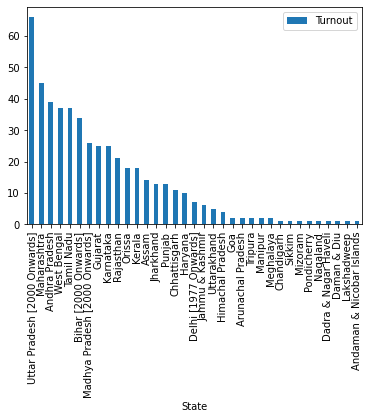

In [ ]:
turnout_04.plot(kind="bar")

In [ ]:
turnout_09 = df2[["State","Turnout"]].groupby(["State"]).aggregate(lambda x: len(x.unique())).sort_values(["Turnout"], ascending = False )
turnout_09

,Turnout
State,
Uttar Pradesh [2000 Onwards],65
Maharashtra,43
West Bengal,41
Andhra Pradesh,38
Tamil Nadu,35
Bihar [2000 Onwards],35
Karnataka,27
Madhya Pradesh [2000 Onwards],26
Rajasthan,25


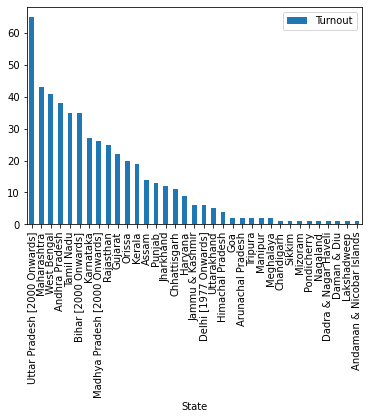

In [ ]:
turnout_09.plot(kind="bar")

In [ ]:
turnout_14 = df3[["State","Turnout"]].groupby(["State"]).aggregate(lambda x: len(x.unique())).sort_values(["Turnout"], ascending = False )
turnout_14

,Turnout
State,
Uttar Pradesh [2000 Onwards],68
Maharashtra,41
West Bengal,38
Bihar [2000 Onwards],36
Tamil Nadu,35
Madhya Pradesh [2000 Onwards],29
Karnataka,28
Gujarat,25
Andhra Pradesh [2014 Onwards],22


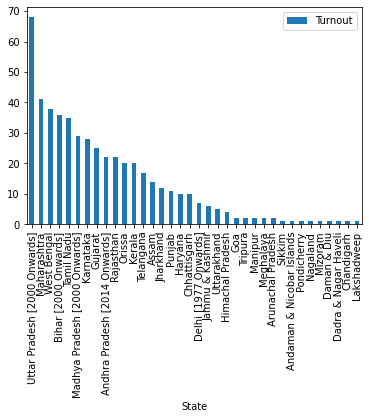

In [ ]:
turnout_14.plot(kind="bar")

In [ ]:
turnout_19 = df4[["State","Turnout"]].groupby(["State"]).aggregate(lambda x: len(x.unique())).sort_values(["Turnout"], ascending = False )
turnout_19

,Turnout
State,
Uttar Pradesh [2000 Onwards],63
Maharashtra,45
West Bengal,39
Bihar [2000 Onwards],38
Tamil Nadu,35
Madhya Pradesh [2000 Onwards],27
Gujarat,26
Karnataka,26
Rajasthan,23


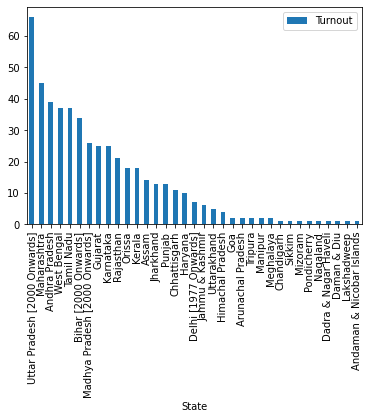

In [ ]:
turnout_04.plot(kind="bar")

### Upon inspecting the graphs for each of the elections you will notice that ceratin states have had lower voting turonouts in some elections which havehad a slight uptick in between but overall very consistent amount of ppl have been voting there does not seem to be a significant increase in voting numbers.

##### Margins By State

In [ ]:
margin_04 = df1[["State","Margin %"]].groupby(["State"]).aggregate(lambda x: len(x.unique())).sort_values(["Margin %"], ascending = False )
margin_04

,Margin %
State,
Uttar Pradesh [2000 Onwards],64.0
Maharashtra,43.0
West Bengal,42.0
Tamil Nadu,38.0
Bihar [2000 Onwards],37.0
Andhra Pradesh,36.0
Madhya Pradesh [2000 Onwards],28.0
Karnataka,27.0
Gujarat,25.0


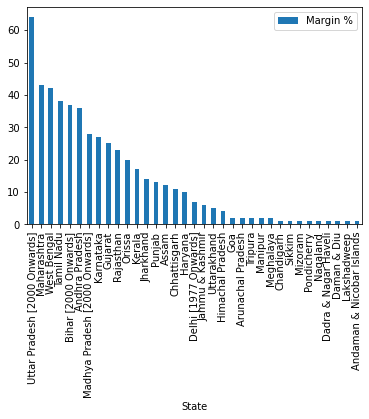

In [ ]:
margin_04.plot(kind="bar")

In [ ]:
margin_09 = df2[["State","Margin %"]].groupby(["State"]).aggregate(lambda x: len(x.unique())).sort_values(["Margin %"], ascending = False )
margin_09

,Margin %
State,
Uttar Pradesh [2000 Onwards],70.0
Maharashtra,44.0
West Bengal,39.0
Bihar [2000 Onwards],37.0
Andhra Pradesh,37.0
Tamil Nadu,36.0
Madhya Pradesh [2000 Onwards],28.0
Karnataka,27.0
Gujarat,24.0


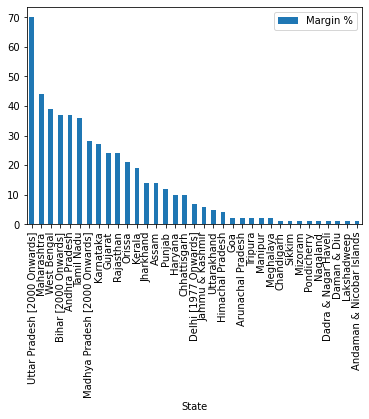

In [ ]:
margin_09.plot(kind="bar")

In [ ]:
margin_14 = df3[["State","Margin %"]].groupby(["State"]).aggregate(lambda x: len(x.unique())).sort_values(["Margin %"], ascending = False )
margin_14

,Margin %
State,
Uttar Pradesh [2000 Onwards],72.0
Maharashtra,44.0
West Bengal,38.0
Tamil Nadu,36.0
Bihar [2000 Onwards],36.0
Madhya Pradesh [2000 Onwards],29.0
Karnataka,28.0
Rajasthan,24.0
Gujarat,24.0


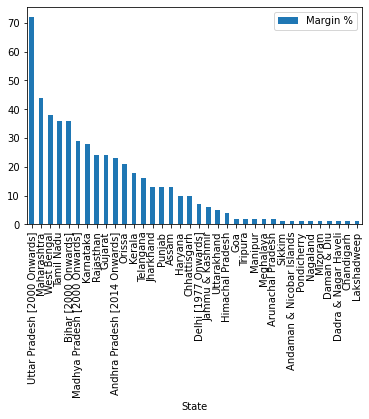

In [ ]:
margin_14.plot(kind="bar")

In [ ]:
margin_19 = df4[["State","Margin %"]].groupby(["State"]).aggregate(lambda x: len(x.unique())).sort_values(["Margin %"], ascending = False )
margin_19

,Margin %
State,
Uttar Pradesh [2000 Onwards],75.0
Maharashtra,43.0
West Bengal,38.0
Tamil Nadu,37.0
Bihar [2000 Onwards],37.0
Madhya Pradesh [2000 Onwards],28.0
Gujarat,25.0
Karnataka,25.0
Rajasthan,24.0


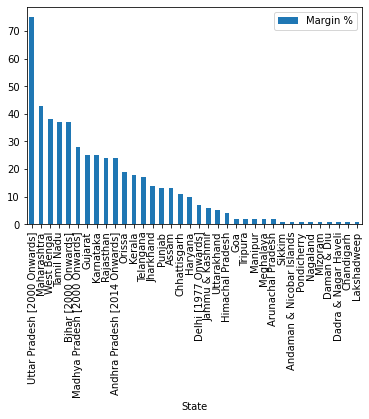

In [ ]:
margin_19.plot(kind="bar")

### As you can see certain states have had candidates with different margins.

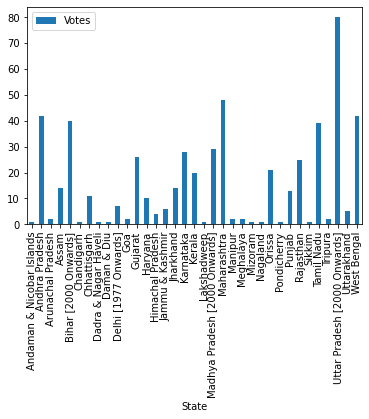

In [ ]:
vote204= df1[["State","Votes"]].groupby(["State"]).aggregate(lambda x: len(x.unique()))
vote204.plot(kind="bar")

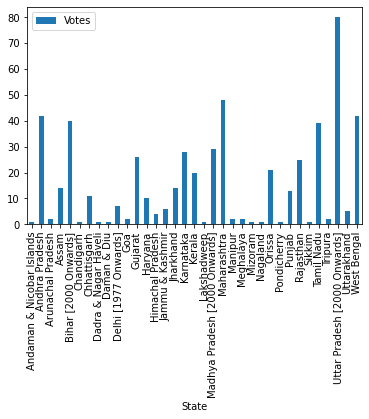

In [ ]:
vote209= df2[["State","Votes"]].groupby(["State"]).aggregate(lambda x: len(x.unique()))
vote209.plot(kind="bar")

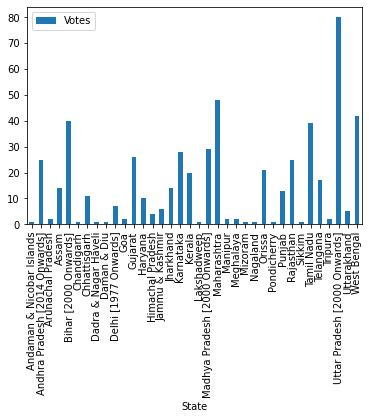

In [ ]:
vote2014= df3[["State","Votes"]].groupby(["State"]).aggregate(lambda x: len(x.unique()))
vote2014.plot(kind="bar")

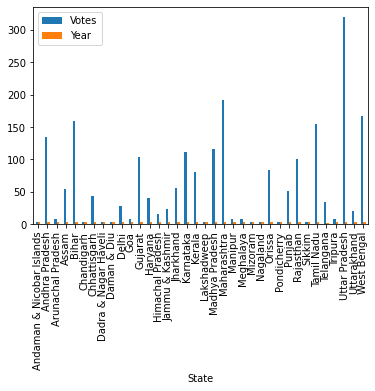

In [ ]:
vote2019= df[["State","Votes","Year"]].groupby(["State"]).aggregate(lambda x: len(x.unique()))
vote2019.plot(kind="bar")

#plotdata=pd.DataFrame({2004,2009,2014,2019},index=[Uttar Pradesh])
#plotdata.plot(kind='bar')

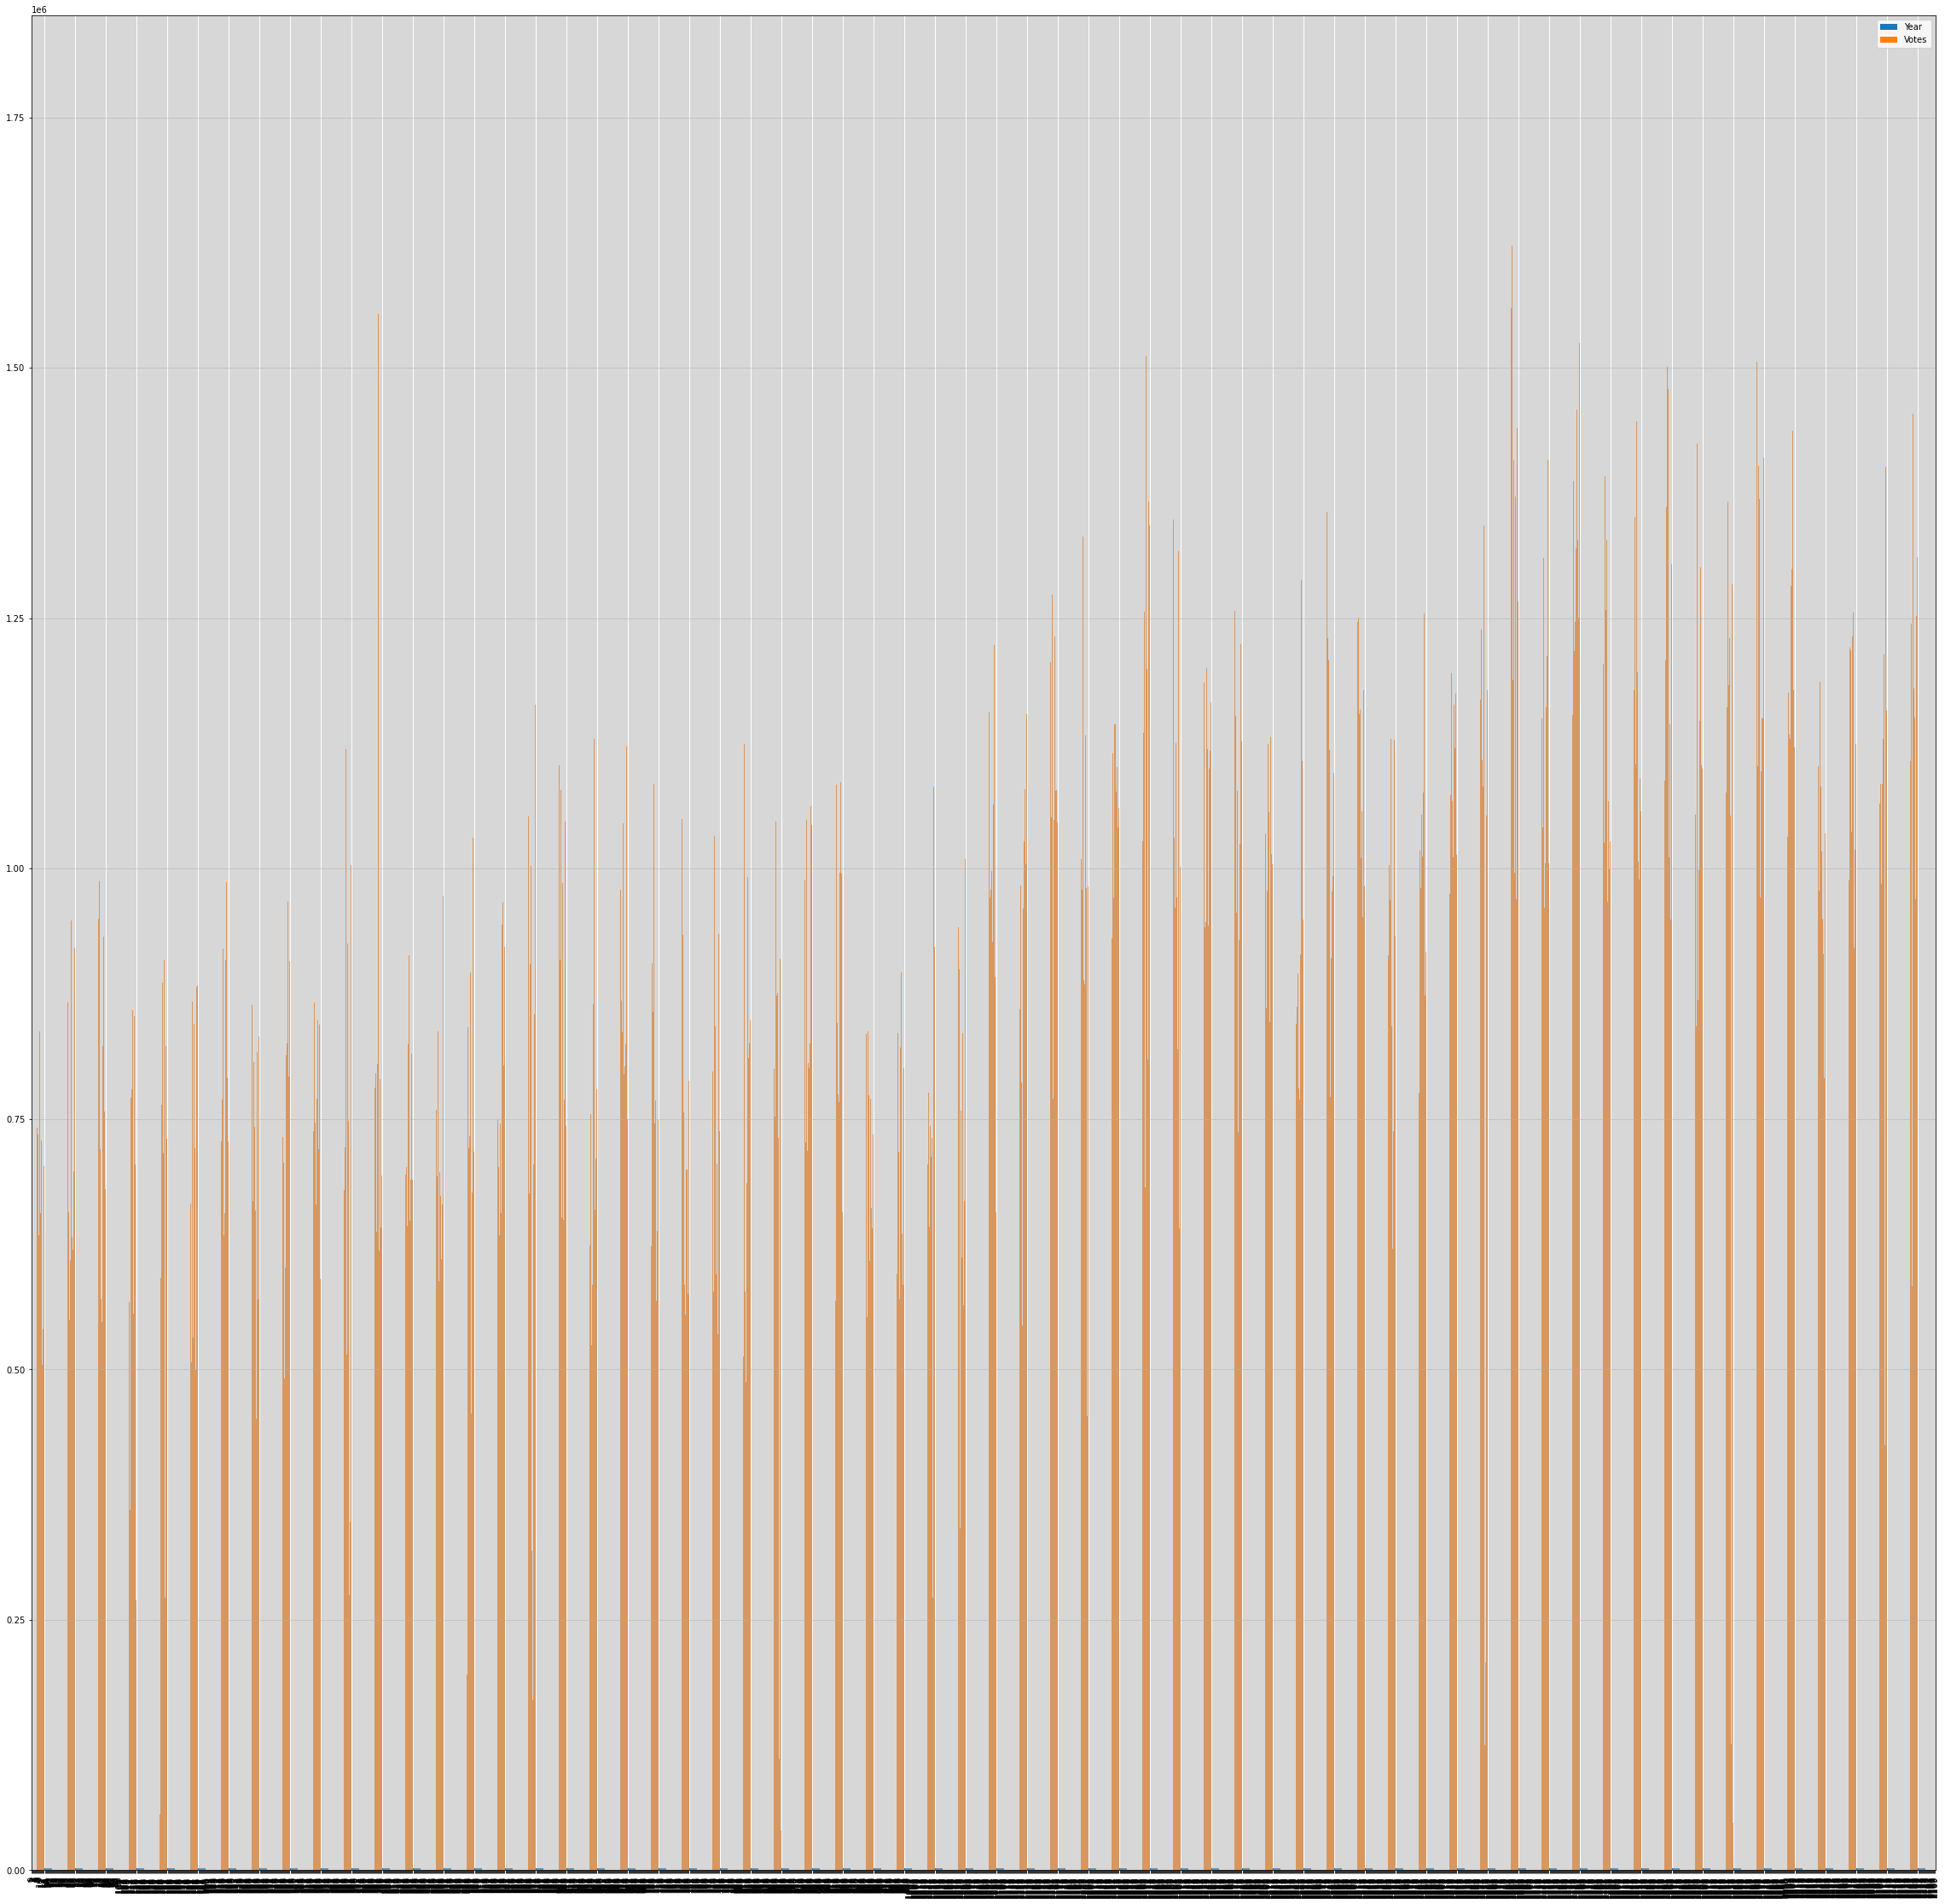

In [ ]:
df.plot(y=['Year','Votes'],kind='bar',figsize=(40,40));
plt.grid(which='major',ls='-',linewidth=0.5)
plt.grid(which='minor',ls=':',linewidth=0.5,color='b')
plt.show()

# Plotting

In [ ]:
df.head()

,PC Name,No,Type,State,Winning Candidate,Party,Electors,Votes,Turnout,Margin,...,Mizoram,Goa,Nagaland,Pondicherry,Meghalaya,Sikkim,Tripura,Telangana,Gujarat,Alliance
0,Adilabad,35,0,Andhra Pradesh,Madhusudhan Reddy Takkala,Telangana Rashtra Samithi,1140834,830601,72.8,40974,...,0,0,0,0,0,0,0,0,0,Independent
1,Adoor,17,0,Kerala,Chengara Surendran,Communist Party Of India,960122,682227,71.1,54534,...,0,0,0,0,0,0,0,0,0,Independent
2,Agra,69,0,Uttar Pradesh,Raj Babbar,Samajwadi Party,1430713,642675,44.9,57342,...,0,0,0,0,0,0,0,0,0,Independent
3,Ahmedabad,10,0,Gujarat,Harin Pathak,Bharatiya Janta Party,1382793,548391,39.7,77605,...,0,0,0,0,0,0,0,0,1,NDA
4,Ahmednagar,39,0,Maharashtra,Gadakh Tukaram Gangadhar,Nationalist Congress Party,1295593,686554,53.0,75077,...,0,0,0,0,0,0,0,0,0,UPA


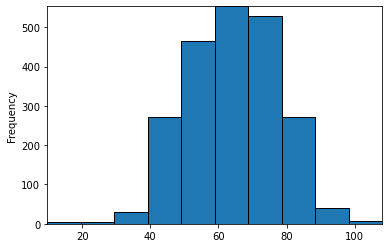

In [ ]:
df['Turnout'].plot.hist(edgecolor='k').autoscale(enable=True,axis='both',tight=True);

[Text(0, 0, 'Andhra Pradesh'),
 Text(0, 0, 'Kerala'),
 Text(0, 0, 'Uttar Pradesh'),
 Text(0, 0, 'Gujarat'),
 Text(0, 0, 'Maharashtra'),
 Text(0, 0, 'Rajasthan'),
 Text(0, 0, 'West Bengal'),
 Text(0, 0, 'Uttarakhand'),
 Text(0, 0, 'Haryana'),
 Text(0, 0, 'Punjab'),
 Text(0, 0, 'Jammu & Kashmir'),
 Text(0, 0, 'Andaman & Nicobar Islands'),
 Text(0, 0, 'Tamil Nadu'),
 Text(0, 0, 'Bihar'),
 Text(0, 0, 'Arunachal Pradesh'),
 Text(0, 0, 'Orissa'),
 Text(0, 0, 'Assam'),
 Text(0, 0, 'Karnataka'),
 Text(0, 0, 'Madhya Pradesh'),
 Text(0, 0, 'Chhattisgarh'),
 Text(0, 0, 'Chandigarh'),
 Text(0, 0, 'Delhi'),
 Text(0, 0, 'Jharkhand'),
 Text(0, 0, 'Dadra & Nagar Haveli'),
 Text(0, 0, 'Daman & Diu'),
 Text(0, 0, 'Himachal Pradesh'),
 Text(0, 0, 'Manipur'),
 Text(0, 0, 'Lakshadweep'),
 Text(0, 0, 'Mizoram'),
 Text(0, 0, 'Goa'),
 Text(0, 0, 'Nagaland'),
 Text(0, 0, 'Pondicherry'),
 Text(0, 0, 'Meghalaya'),
 Text(0, 0, 'Sikkim'),
 Text(0, 0, 'Tripura'),
 Text(0, 0, 'Telangana')]

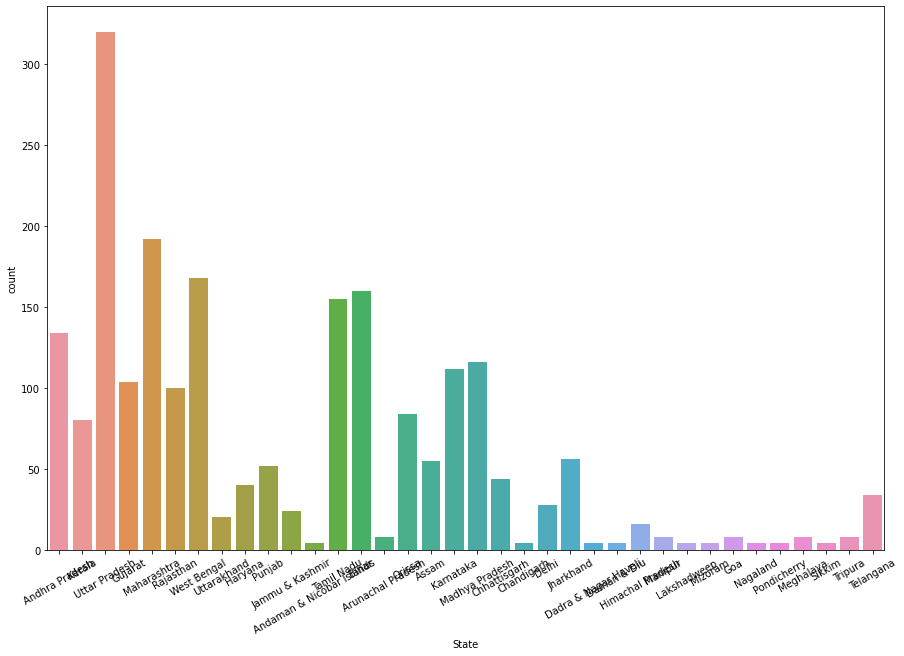

In [ ]:
plt.figure(figsize=(15,10))
ax=sns.countplot(x='State',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

[Text(0, 0, 'Independent'), Text(0, 0, 'NDA'), Text(0, 0, 'UPA')]

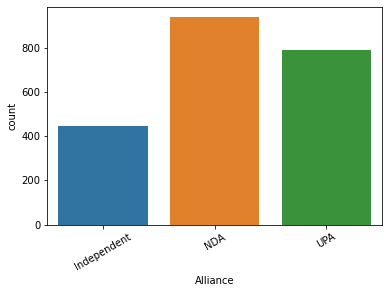

In [ ]:
ax=sns.countplot(x='Alliance',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

In [ ]:
df.head(5)

,PC Name,No,Type,State,Winning Candidate,Party,Electors,Votes,Turnout,Margin,...,Mizoram,Goa,Nagaland,Pondicherry,Meghalaya,Sikkim,Tripura,Telangana,Gujarat,Alliance
0,Adilabad,35,0,Andhra Pradesh,Madhusudhan Reddy Takkala,Telangana Rashtra Samithi,1140834,830601,72.8,40974,...,0,0,0,0,0,0,0,0,0,Independent
1,Adoor,17,0,Kerala,Chengara Surendran,Communist Party Of India,960122,682227,71.1,54534,...,0,0,0,0,0,0,0,0,0,Independent
2,Agra,69,0,Uttar Pradesh,Raj Babbar,Samajwadi Party,1430713,642675,44.9,57342,...,0,0,0,0,0,0,0,0,0,Independent
3,Ahmedabad,10,0,Gujarat,Harin Pathak,Bharatiya Janta Party,1382793,548391,39.7,77605,...,0,0,0,0,0,0,0,0,1,NDA
4,Ahmednagar,39,0,Maharashtra,Gadakh Tukaram Gangadhar,Nationalist Congress Party,1295593,686554,53.0,75077,...,0,0,0,0,0,0,0,0,0,UPA


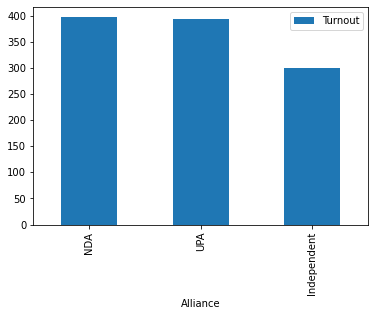

In [ ]:
alliance = df[["Turnout","Alliance"]].groupby(["Alliance"]).aggregate(lambda x: len(x.unique())).sort_values(["Turnout"], ascending = False )
alliance.plot(kind="bar")

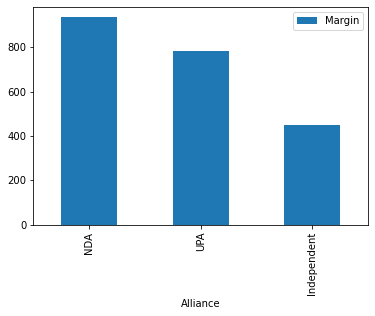

In [ ]:
alliance = df[["Alliance","Margin"]].groupby(["Alliance"]).aggregate(lambda x: len(x.unique())).sort_values(["Margin"], ascending = False )
alliance.plot(kind="bar")

## Modelling

### Linear Regression

In [ ]:
x = df['Votes']
y = df['Turnout']
x_ = x.values.reshape(-1,1)

In [ ]:
xtr,xts,ytr,yts=train_test_split(x_,y,train_size=0.9,random_state=41)

In [ ]:
LR=LinearRegression()
LR.fit(xtr,ytr)

LinearRegression()

In [ ]:
y_pred=LR.predict(xts)
y_pred

array([57.65346953, 47.15608853, 68.51443988, 73.8595172 , 76.26910234,
       78.25227556, 63.92032431, 56.12000644, 70.37416383, 59.72946498,
       59.43152132, 57.15824656, 71.75805624, 59.643002  , 58.39365192,
       68.91689766, 70.11049738, 41.43878125, 65.28933094, 79.84605171,
       72.35277437, 64.52393968, 72.00943194, 65.81272852, 48.5288879 ,
       66.46043089, 65.8418727 , 68.12606941, 67.05951209, 69.80944538,
       79.31689374, 56.29846465, 64.05746166, 62.8887286 , 76.81277537,
       52.15705348, 60.36929671, 72.62810419, 62.21958159, 80.46324109,
       65.25679325, 68.12752377, 64.74662747, 71.80034667, 60.40819364,
       70.09689486, 61.98865244, 63.54743846, 75.93816472, 56.7310647 ,
       59.92688688, 56.87852514, 70.22211218, 48.30371915, 70.79635524,
       66.15763937, 70.85914926, 68.6878221 , 63.8209147 , 66.12022531,
       76.83915342, 65.79122684, 59.03664901, 56.60008698, 55.33556595,
       60.21000179, 69.64521706, 71.83068856, 69.21486984, 56.85

In [ ]:
weights=LR.coef_
intercept =LR.intercept_
print(weights,intercept)

[2.85168128e-05] 38.27304431564117


In [ ]:
LR.score(xts,yts)

0.3587895095647533

In [ ]:
data=pd.DataFrame({'Actual':yts,'Predicted':y_pred})
data

,Actual,Predicted
250,49.6,57.653470
524,61.8,47.156089
2157,59.7,68.514440
1702,82.5,73.859517
1221,82.6,76.269102
...,...,...
134,74.7,63.208858
1958,79.5,67.777052
297,63.2,63.726752
1395,70.8,41.638855


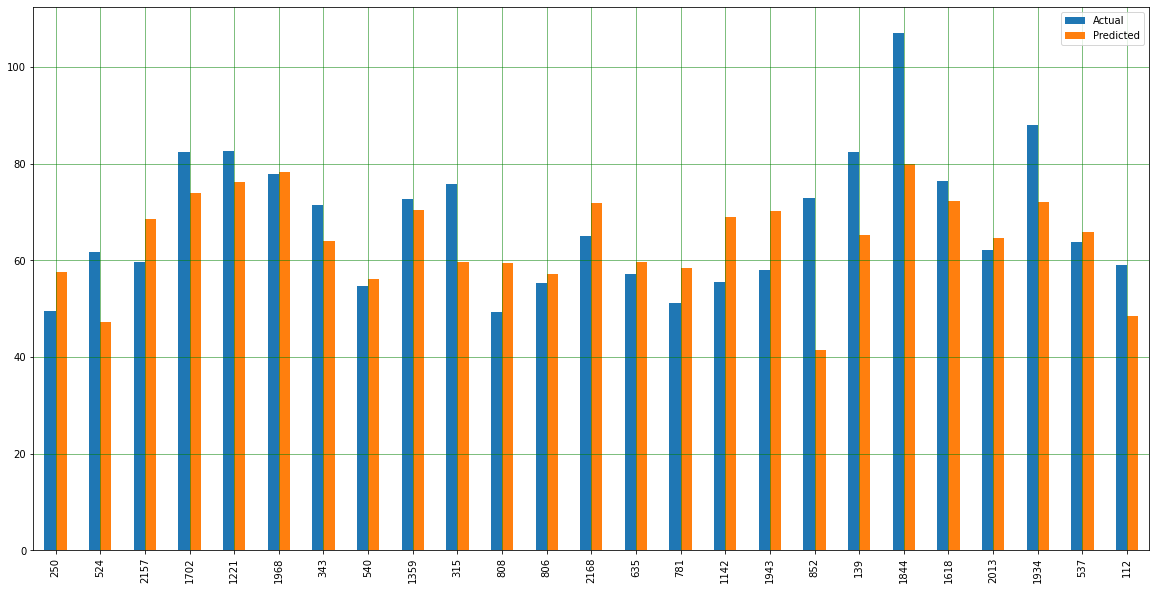

In [ ]:
import matplotlib.pyplot as plt
df1=data.head(25)
df1.plot(y=['Actual','Predicted'],kind='bar',figsize=(20,10));
plt.grid(which='major',ls='-',linewidth=0.5,color='g')
plt.grid(which='minor',ls=':',linewidth=0.5,color='b')
plt.show()

### Multivariate Linear Regression

In [ ]:
x = df[['2004','NDA','Electors','Maharashtra','Type']]=StandardScaler().fit_transform(df[['2004','NDA','Electors','Maharashtra','Type']])
y = df['Votes']

In [ ]:
trainx,testx,trainy,testy=train_test_split(x,y,test_size=0.2,random_state=41)

lr=LinearRegression()
lr.fit(trainx,trainy)

pred=lr.predict(testx)
mean_squared_error(pred,testy)

data=pd.DataFrame({'Actual':testy,'Predicted':pred})
data

,Actual,Predicted
250,679614,8.031649e+05
524,311502,3.635692e+05
2157,1060476,1.102860e+06
1702,1247912,9.681991e+05
1221,1332409,1.073176e+06
...,...,...
1403,997902,1.179630e+06
335,848741,6.767558e+05
547,690071,9.353316e+05
1238,1041226,9.941614e+05


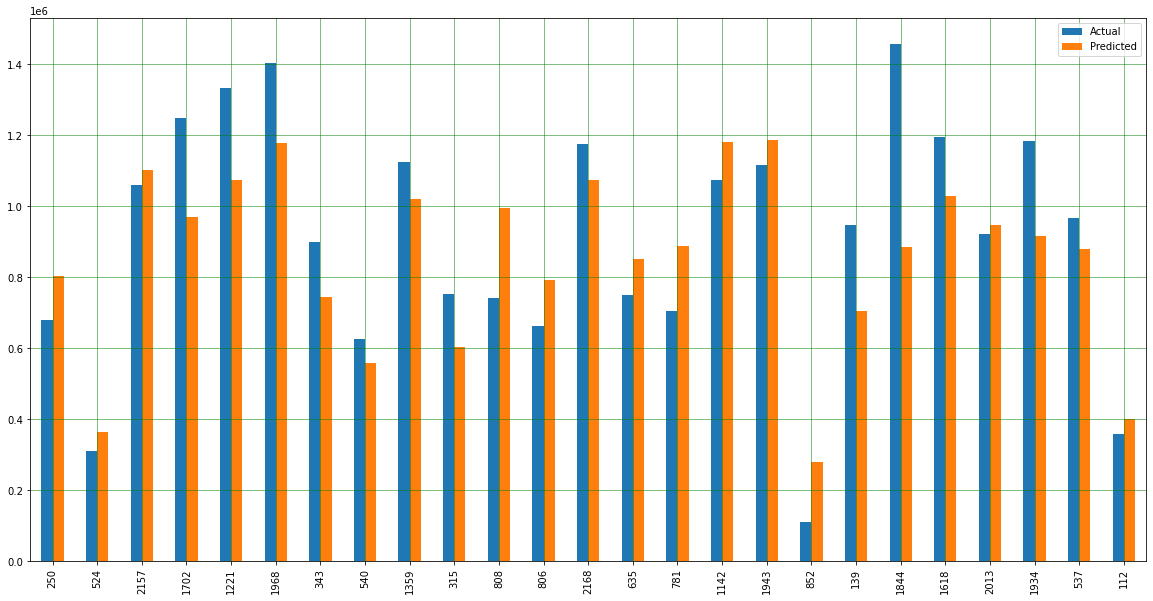

In [ ]:
import matplotlib.pyplot as plt
df1=data.head(25)
df1.plot(y=['Actual','Predicted'],kind='bar',figsize=(20,10));
plt.grid(which='major',ls='-',linewidth=0.5,color='g')
plt.grid(which='minor',ls=':',linewidth=0.5,color='b')
plt.show()

In [ ]:
x = df[['2019','NDA','Electors','Maharashtra','Type']]=StandardScaler().fit_transform(df[['2019','NDA','Electors','Maharashtra' ,'Type']])
y = df['Turnout']

In [ ]:
trainx,testx,trainy,testy=train_test_split(x,y,test_size=0.2,random_state=41)

lr=LinearRegression()
lr.fit(trainx,trainy)

pred=lr.predict(testx)
mean_squared_error(pred,testy)

data=pd.DataFrame({'Actual':testy,'Predicted':pred})
data

,Actual,Predicted
250,49.6,63.298269
524,61.8,73.237214
2157,59.7,68.310673
1702,82.5,70.910919
1221,82.6,61.885286
...,...,...
1403,52.7,55.491457
335,70.2,61.400923
547,48.2,60.208755
1238,65.9,57.622235


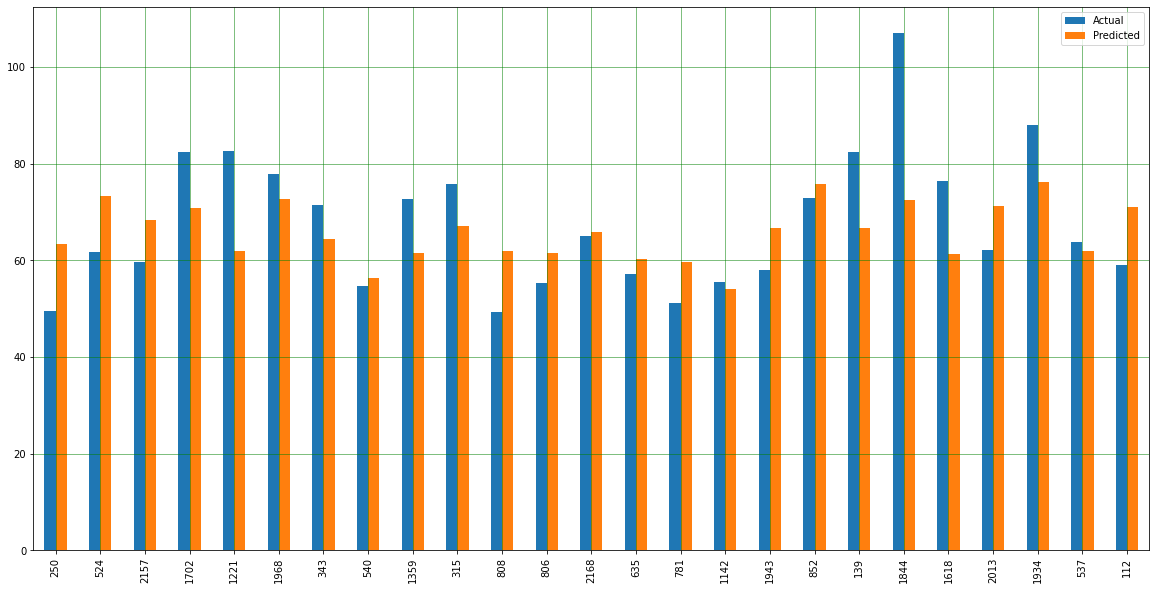

In [ ]:
import matplotlib.pyplot as plt
df1=data.head(25)
df1.plot(y=['Actual','Predicted'],kind='bar',figsize=(20,10));
plt.grid(which='major',ls='-',linewidth=0.5,color='g')
plt.grid(which='minor',ls=':',linewidth=0.5,color='b')
plt.show()

### Logistic Regression

### Predicting type of candidate

In [ ]:
x = df[['2019','NDA','Maharashtra']]
y = df.Year

In [ ]:
xtr,xts,ytr,yts=train_test_split(x,y,train_size=0.8,random_state=100)

In [ ]:
turnout = preprocessing.LabelEncoder()
ytsEncoded = turnout.fit_transform(yts)

turnout = preprocessing.LabelEncoder()
ytrEncoded = turnout.fit_transform(ytr)

In [ ]:
print(utils.multiclass.type_of_target(ytsEncoded))

print(utils.multiclass.type_of_target(ytrEncoded))

multiclass
multiclass


In [ ]:
model=LogisticRegression()
model.fit(xtr,ytrEncoded);

In [ ]:
y_predict=model.predict(xts)
y_predict

array([1, 1, 2, 1, 1, 1, 1, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 2, 3, 1, 1, 1,
       1, 1, 2, 1, 2, 3, 1, 3, 3, 1, 2, 3, 2, 1, 1, 1, 1, 3, 3, 2, 2, 3,
       2, 3, 1, 1, 2, 3, 2, 1, 1, 1, 1, 2, 1, 3, 1, 1, 2, 1, 3, 1, 2, 2,
       1, 1, 2, 1, 3, 1, 2, 1, 1, 2, 1, 3, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       3, 1, 2, 1, 3, 2, 1, 2, 1, 2, 2, 1, 1, 1, 3, 1, 2, 2, 1, 3, 3, 1,
       2, 1, 1, 2, 3, 3, 3, 2, 3, 3, 1, 2, 1, 3, 2, 2, 2, 2, 3, 1, 1, 3,
       1, 1, 2, 1, 3, 2, 1, 2, 1, 3, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 3, 2, 3, 3, 2, 3, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 3,
       2, 1, 2, 1, 1, 3, 1, 1, 3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 1, 2, 3, 2,
       1, 3, 2, 1, 2, 3, 3, 1, 2, 1, 2, 1, 2, 1, 1, 1, 3, 2, 2, 2, 1, 2,
       1, 3, 1, 3, 2, 2, 1, 2, 1, 1, 1, 2, 3, 1, 1, 2, 1, 3, 1, 1, 3, 1,
       2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 3, 1, 1, 2, 3, 3, 1, 1, 2, 3, 3, 3,
       3, 2, 1, 3, 1, 2, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 2, 3, 2, 3,
       1, 2, 1, 1, 3, 1, 3, 2, 3, 1, 3, 1, 2, 1, 1,

In [ ]:
print(classification_report(ytsEncoded,y_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       105
           1       0.41      0.71      0.52       109
           2       0.51      0.62      0.56       104
           3       1.00      1.00      1.00       116

    accuracy                           0.59       434
   macro avg       0.48      0.58      0.52       434
weighted avg       0.49      0.59      0.53       434



C:\Users\OMSAI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
data=pd.DataFrame({'Actual':ytsEncoded,'Predicted':y_predict})
data

,Actual,Predicted
0,1,1
1,2,1
2,2,2
3,2,1
4,2,1
...,...,...
429,2,2
430,0,1
431,0,2
432,0,2


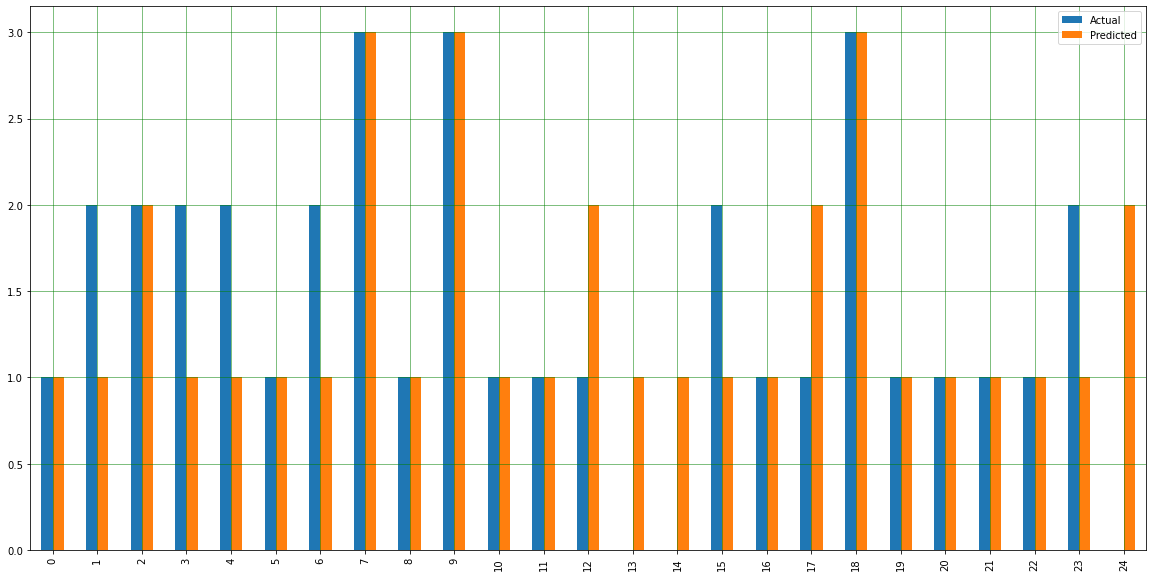

In [ ]:
df1=data.head(25)
df1.plot(y=['Actual','Predicted'],kind='bar',figsize=(20,10));
plt.grid(which='major',ls='-',linewidth=0.5,color='g')
plt.grid(which='minor',ls=':',linewidth=0.5,color='b')
plt.show()

### SVR

In [ ]:
x = df[['Electors', 'Votes', 'Type' , 'Telangana','Year','2014','NDA']]=StandardScaler().fit_transform(df[['Electors', 'Votes', 'Type' , 'Telangana','Year','2014','NDA']])

In [ ]:
y = df.Turnout

In [ ]:
xtr,xts,ytr,yts=train_test_split(x,y,train_size=0.8,random_state=42)

In [ ]:
regressor = SVR(kernel = 'rbf')
regressor.fit(xtr, ytr)

SVR()

In [ ]:
pred=regressor.predict(xts)
mean_squared_error(pred,yts)

6.989168797178546

In [ ]:
mean_absolute_error(pred,yts)

1.388654139453765

In [ ]:
data=pd.DataFrame({'Actual':yts,'Predicted':pred})
data

,Actual,Predicted
1202,58.8,58.628752
342,70.3,67.779760
1341,55.1,54.927875
765,70.6,67.415485
1085,75.1,76.219797
...,...,...
543,76.3,74.663157
987,65.5,66.457343
909,90.0,84.729730
256,39.3,46.529851


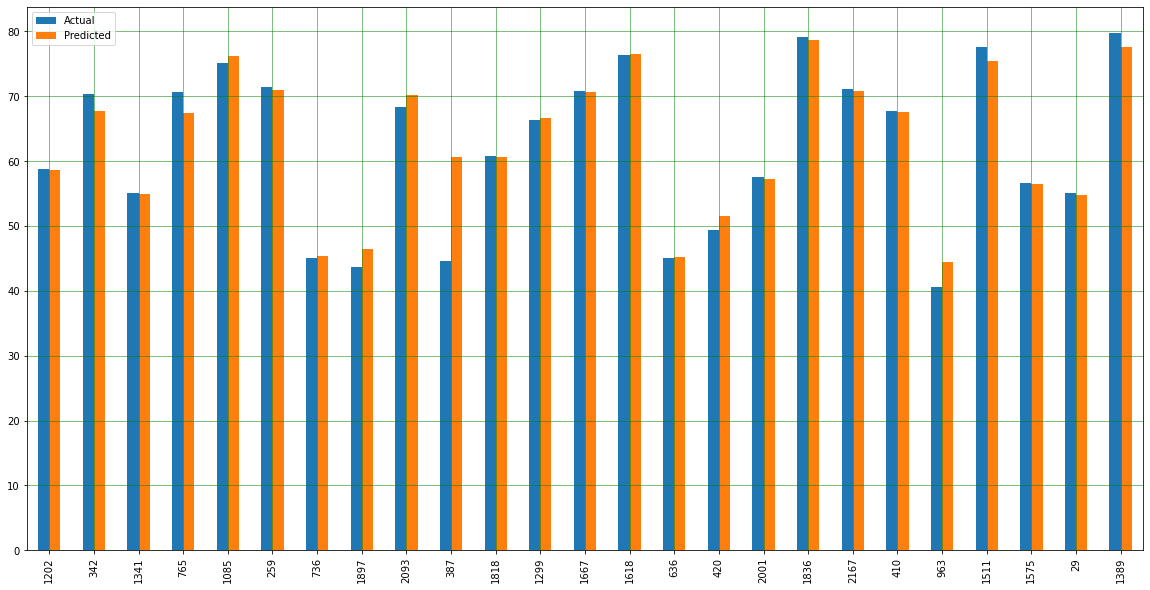

In [ ]:
df1=data.head(25)
df1.plot(y=['Actual','Predicted'],kind='bar',figsize=(20,10));
plt.grid(which='major',ls='-',linewidth=0.5,color='g')
plt.grid(which='minor',ls=':',linewidth=0.5,color='b')
plt.show()